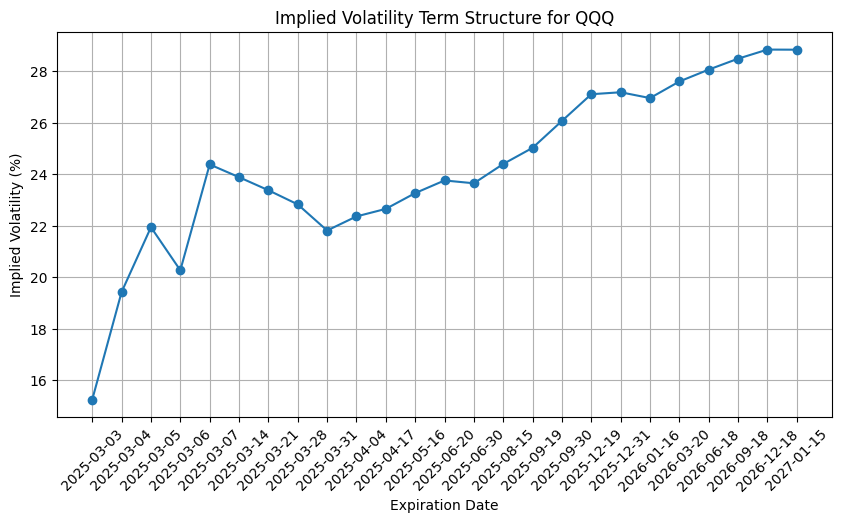

In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def get_atm_iv(ticker):
    stock = yf.Ticker(ticker)
    expiry_dates = stock.options  # Get available expiration dates
    atm_iv = []

    for expiry in expiry_dates:
        opt_chain = stock.option_chain(expiry)
        calls, puts = opt_chain.calls, opt_chain.puts

        # Find the closest strike price to the current stock price
        spot_price = stock.history(period='1d')['Close'].iloc[-1]
        strikes = calls['strike']
        atm_strike = strikes.iloc[(strikes - spot_price).abs().argsort()[0]]

        # Get IV for ATM call option
        atm_call_iv = calls.loc[calls['strike'] == atm_strike, 'impliedVolatility'].values
        if len(atm_call_iv) > 0:
            atm_iv.append((expiry, atm_call_iv[0]))

    return atm_iv

def plot_iv_term_structure(ticker):
    atm_iv_data = get_atm_iv(ticker)

    if not atm_iv_data:
        print("No data available.")
        return

    expiry_dates, iv_values = zip(*atm_iv_data)

    plt.figure(figsize=(10,5))
    plt.plot(expiry_dates, np.array(iv_values) * 100, marker='o', linestyle='-')
    plt.xlabel('Expiration Date')
    plt.ylabel('Implied Volatility (%)')
    plt.title(f'Implied Volatility Term Structure for {ticker}')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Run for Apple (AAPL)
plot_iv_term_structure("QQQ")
